**Import Library**

In [49]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**Download and prepare the CIFAR-10 dataset**

In [50]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [52]:
train_images, test_images = train_images / 255.0, test_images / 255.0

**Feature Extraction - Convolutional Base**

In [54]:
train_images[100].shape

(32, 32, 3)

In [99]:
model = models.Sequential()
model.add(layers.Conv2D( 16, (3,3), activation='relu', input_shape=(32,32,3) ) )
model.add(layers.MaxPooling2D( (2,2) ))
model.add(layers.Conv2D( 16, (3,3), activation='relu' ) )
model.add(layers.MaxPooling2D( (2,2) ))
model.add(layers.Conv2D( 16, (3,3), activation='relu' ) )
model.add(layers.Dropout(0.25))

In [100]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 6, 6, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 4, 4, 16)          2320      
                                                                 
 dropout_3 (Dropout)         (None, 4, 4, 16)        

**Flatten & Fully Connected Layer**

In [101]:
model.add(layers.Flatten())
model.add(layers.Dense(100, activation= 'relu'))
model.add(layers.Dense(100))

In [102]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 6, 6, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 4, 4, 16)          2320      
                                                                 
 dropout_3 (Dropout)         (None, 4, 4, 16)        

**Compile and train the model**

In [103]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [104]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=1, validation_data=(test_images, test_labels))

Epoch 1/10
50000/50000 [==============================] - 68s 1ms/step - loss: 1.6912 - accuracy: 0.3741 - val_loss: 1.4569 - val_accuracy: 0.4543
Epoch 2/10
50000/50000 [==============================] - 71s 1ms/step - loss: 1.5232 - accuracy: 0.4458 - val_loss: 1.4151 - val_accuracy: 0.4835
Epoch 3/10
50000/50000 [==============================] - 73s 1ms/step - loss: 1.4920 - accuracy: 0.4665 - val_loss: 1.4109 - val_accuracy: 0.4923
Epoch 4/10
50000/50000 [==============================] - 71s 1ms/step - loss: 1.4633 - accuracy: 0.4744 - val_loss: 1.3486 - val_accuracy: 0.5049
Epoch 5/10
50000/50000 [==============================] - 69s 1ms/step - loss: 1.4503 - accuracy: 0.4801 - val_loss: 1.4729 - val_accuracy: 0.4619
Epoch 6/10
50000/50000 [==============================] - 70s 1ms/step - loss: 1.4534 - accuracy: 0.4809 - val_loss: 1.4200 - val_accuracy: 0.4889
Epoch 7/10
50000/50000 [==============================] - 70s 1ms/step - loss: 1.4436 - accuracy: 0.4832 - val_loss: 1

**Evaluate the model**

In [105]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.3773 - accuracy: 0.5063


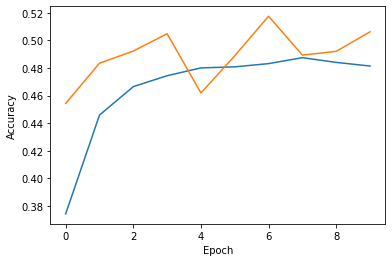

In [106]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()




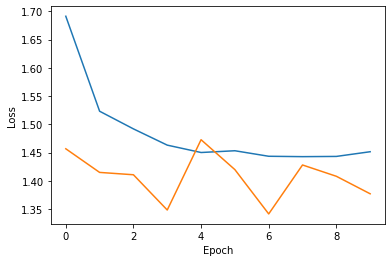

In [107]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


